In [1]:
%matplotlib inline

In [2]:
def distance(target, source, insertcost, deletecost, replacecost):
    n = len(target)+1
    m = len(source)+1
    # set up dist and initialize values
    dist = [ [0 for j in range(m)] for i in range(n) ]
    for i in range(1,n):
        dist[i][0] = dist[i-1][0] + insertcost
    for j in range(1,m):
        dist[0][j] = dist[0][j-1] + deletecost
    # align source and target strings
    for j in range(1,m):
        for i in range(1,n):
            inscost = insertcost + dist[i-1][j]
            delcost = deletecost + dist[i][j-1]
            if (source[j-1] == target[i-1]): add = 0
            else: add = replacecost
            substcost = add + dist[i-1][j-1]
            dist[i][j] = min(inscost, delcost, substcost)
    view_distance(target, source, dist, n-1, m-1, insertcost, deletecost, replacecost)
    # return min edit distance
    return dist[n-1][m-1]

def view_distance(target, source, dist, i, j, insertcost, deletecost, replacecost):
    print "levenshtein distance =", dist[i][j]
    tgt_s, src_s, align_s = '', '', ''
    while (i > 0) or (j > 0):
        if (i > 0) and (j > 0):
            if (dist[i][j] == dist[i-1][j-1]) and (target[i-1] == source[j-1]):
                tgt_s = target[i-1] + " " + tgt_s
                src_s = source[j-1] + " " + src_s
                align_s = "| " + align_s
                i, j = i-1, j-1
                continue
            if (dist[i][j] == (dist[i-1][j-1] + replacecost)):
                tgt_s = target[i-1] + " " + tgt_s
                src_s = source[j-1] + " " + src_s
                align_s = "  " + align_s
                i, j = i-1, j-1
                continue
        if (i > 0) and (dist[i][j] == (dist[i-1][j] + insertcost)):
            tgt_s = target[i-1] + " " + tgt_s
            src_s = "_ " + src_s
            align_s = "  " + align_s
            i = i-1
        elif (j > 0) and (dist[i][j] == (dist[i][j-1] + deletecost)):
            tgt_s = "_ " + tgt_s
            src_s = source[j-1] + " " + src_s
            align_s = "  " + align_s
            j = j-1
        else:
            raise ValueError("error for location %d, %d" % (i, j))
    print tgt_s, "\n", align_s, "\n", src_s

In [3]:
distance("gamble", "gumbo", 1, 1, 2)

levenshtein distance = 5
g a m b l e  
|   | |      
g u m b _ o 


5

In [4]:
distance("recognize speech", "wreck a nice beach", 1, 1, 2)

levenshtein distance = 14
_ r e c _ _ o g n i z e   s p e e c h  
  | | |         | |   | |     |   | |  
w r e c k   a   n i c e   _ b e a c h 


14

In [5]:
distance("execution", "intention", 1, 1, 2)

levenshtein distance = 8
_ e x e c u t i o n  
      |     | | | |  
i n t e _ n t i o n 


8

In [6]:
def distance(target, source, insertcost, deletecost, replacecost, max):
    n = len(target)+1
    m = len(source)+1
    # set up dist and initialize values
    dist = [ [0 for j in range(m+1)] for i in range(n+1) ]
    for i in range(1,n):
        dist[i][0] = dist[i-1][0] + insertcost
    for j in range(1,m):
        dist[0][j] = dist[0][j-1] + deletecost
    # align source and target strings
    for j in range(1,m):
        for i in range(1,n):
            inscost = insertcost + dist[i-1][j]
            delcost = deletecost + dist[i][j-1]
            if (source[j-1] == target[i-1]): add = 0
            else: add = replacecost
            substcost = add + dist[i-1][j-1]
            dist[i][j] = min(inscost, delcost, substcost)
    viewall_distance(target, source, dist, n-1, m-1, insertcost, deletecost, replacecost, max)
    # return min edit distance
    return dist[n-1][m-1]

def viewall_distance(target, source, dist, i, j, insertcost, deletecost, replacecost, max):
    print "levenshtein distance =", dist[i][j]
    print "# printing out max %d alignments" % max

    verbose = 0
    # print out the distance matrix if verbose
    if (verbose):
        for p in range(0,j+1):
            for q in range(0,i+1):
                print dist[q][p], 
                print
        print

    alignments = get_alignments(target, source, dist, i, j, insertcost, deletecost, replacecost, max)
    for i in xrange(0,len(alignments)):
        print "# alignment number", i+1
        print "%s\n%s\n%s" % (alignments[i][2], alignments[i][1], alignments[i][0])

def get_alignments(target, source, dist, i, j, insertcost, deletecost, replacecost, max):

    # return an empty alignment string
    if (i == 0) and (j == 0):
        return [ ['', '', ''] ]

    alignments = []

    # alignment type is equal or replace
    if (i > 0) and (j > 0):
        if (dist[i][j] == dist[i-1][j-1]) and (target[i-1] == source[j-1]):
            new_al = get_alignments(target, source, dist, i-1, j-1, insertcost, deletecost, replacecost, max)
            new_al = [ [al[0] + target[i-1] + " ", al[1] + "| ", al[2] + source[j-1] + " "] for al in new_al]
            alignments += new_al
            if (len(alignments) > max):
        	return alignments[:numaligments]
        if (dist[i][j] == (dist[i-1][j-1] + replacecost)):
            new_al = get_alignments(target, source, dist, i-1, j-1, insertcost, deletecost, replacecost, max)
            new_al = [ [al[0] + target[i-1] + " ", al[1] + "  ", al[2] + source[j-1] + " "] for al in new_al]
            alignments += new_al
            if (len(alignments) > max):
        	return alignments[:max]

    # alignment type is delete
    if (i > 0) and (dist[i][j] == (dist[i-1][j] + insertcost)):
        new_al = get_alignments(target, source, dist, i-1, j, insertcost, deletecost, replacecost, max)
        new_al = [ [al[0] + target[i-1] + " ", al[1] + "  ", al[2] + "_ "] for al in new_al]
        alignments += new_al
        if (len(alignments) > max):
            return alignments[:max]
    # alignment type is insert
    if (j > 0) and (dist[i][j] == (dist[i][j-1] + deletecost)):
        new_al = get_alignments(target, source, dist, i, j-1, insertcost, deletecost, replacecost, max)
        new_al = [ [al[0] + "_ ", al[1] + "  ", al[2] + source[j-1] + " "] for al in new_al]
        alignments += new_al
        if (len(alignments) > max):
            return alignments[:max]

    if (len(alignments) == 0):
        raise ValueError("error for location %d, %d" % (i, j))

    return alignments

In [8]:
distance("gamble", "gumbo", 1, 1, 2, 100)

levenshtein distance = 5
# printing out max 100 alignments
# alignment number 1
g u m b _ o 
|   | |     
g a m b l e 
# alignment number 2
g u _ m b _ o 
|     | |     
g _ a m b l e 
# alignment number 3
g _ u m b _ o 
|     | |     
g a _ m b l e 
# alignment number 4
g u m b o _ 
|   | |     
g a m b l e 
# alignment number 5
g u _ m b o _ 
|     | |     
g _ a m b l e 
# alignment number 6
g _ u m b o _ 
|     | |     
g a _ m b l e 
# alignment number 7
g u m b o _ _ 
|   | |       
g a m b _ l e 
# alignment number 8
g u _ m b o _ _ 
|     | |       
g _ a m b _ l e 
# alignment number 9
g _ u m b o _ _ 
|     | |       
g a _ m b _ l e 
# alignment number 10
g u m b _ o _ 
|   | |       
g a m b l _ e 
# alignment number 11
g u _ m b _ o _ 
|     | |       
g _ a m b l _ e 
# alignment number 12
g _ u m b _ o _ 
|     | |       
g a _ m b l _ e 
# alignment number 13
g u m b _ _ o 
|   | |       
g a m b l e _ 
# alignment number 14
g u _ m b _ _ o 
|     | |       
g _ a m b l

5

In [10]:
distance("recognize speech", "wreck a nice beach", 1, 1, 2, 200)

levenshtein distance = 14
# printing out max 200 alignments
# alignment number 1
w r e c k   a   n i c e   _ b e a c h 
  | | |         | |   | |     |   | | 
_ r e c _ _ o g n i z e   s p e e c h 
# alignment number 2
w r e c k   a _   n i c e   _ b e a c h 
  | | |           | |   | |     |   | | 
_ r e c _ _ _ o g n i z e   s p e e c h 
# alignment number 3
w r e c k   a   n i c e   _ b e a c h 
  | | |         | |   | |     |   | | 
_ r e c _ o _ g n i z e   s p e e c h 
# alignment number 4
w r e c k   _ a   n i c e   _ b e a c h 
  | | |           | |   | |     |   | | 
_ r e c _ _ o _ g n i z e   s p e e c h 
# alignment number 5
w r e c k   a   n i c e   _ b e a c h 
  | | |         | |   | |     |   | | 
_ r e c o _ _ g n i z e   s p e e c h 
# alignment number 6
w r e c k _   a   n i c e   _ b e a c h 
  | | |           | |   | |     |   | | 
_ r e c _ o _ _ g n i z e   s p e e c h 
# alignment number 7
w r e c _ k   a   n i c e   _ b e a c h 
  | | |           | |   | |     

14

In [11]:
distance("execution", "intention", 1, 1, 2, 134)

levenshtein distance = 8
# printing out max 134 alignments
# alignment number 1
i n t e _ n t i o n 
      |     | | | | 
_ e x e c u t i o n 
# alignment number 2
i n _ t e _ n t i o n 
        |     | | | | 
_ _ e x e c u t i o n 
# alignment number 3
i n t e _ n t i o n 
      |     | | | | 
e _ x e c u t i o n 
# alignment number 4
i _ n t e _ n t i o n 
        |     | | | | 
_ e _ x e c u t i o n 
# alignment number 5
_ i n t e _ n t i o n 
        |     | | | | 
e _ _ x e c u t i o n 
# alignment number 6
i n t _ e _ n t i o n 
        |     | | | | 
_ _ e x e c u t i o n 
# alignment number 7
i n t _ _ e _ n t i o n 
          |     | | | | 
_ _ _ e x e c u t i o n 
# alignment number 8
i n t _ e _ n t i o n 
        |     | | | | 
_ e _ x e c u t i o n 
# alignment number 9
i n _ t _ e _ n t i o n 
          |     | | | | 
_ _ e _ x e c u t i o n 
# alignment number 10
i n t _ e _ n t i o n 
        |     | | | | 
e _ _ x e c u t i o n 
# alignment number 11
i _ n t _ e _ n t 

8

In [12]:
from __future__ import division
import numpy
import matplotlib.pyplot as plt

#Initial idea from David Warde-Farley on the SciPy Cookbook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.ticker import NullLocator

def hinton(W, maxWeight=None, ax=None):
    """
    Draws a Hinton diagram for visualizing a weight matrix.
    """
    if not ax:
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)

    if not maxWeight:
        maxWeight = 2**np.ceil(np.log(np.abs(W).max())/np.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())

    for (x,y),w in np.ndenumerate(W):
        if w > 0: color = 'white'
        else:     color = 'black'
        size = np.sqrt(np.abs(w))
        rect = Rectangle([x - size / 2, y - size / 2], size, size,
            facecolor=color, edgecolor=color)
        ax.add_patch(rect)
    ax.autoscale_view()

    # Reverse the yaxis limits
    ax.set_ylim(*ax.get_ylim()[::-1])

def distance(target, source, insertcost, deletecost, replacecost):
    n = len(target)+1
    m = len(source)+1
    # set up dist and initialize values
    dist = [ [0 for j in range(m)] for i in range(n) ]
    for i in range(1,n):
        dist[i][0] = dist[i-1][0] + insertcost
    for j in range(1,m):
        dist[0][j] = dist[0][j-1] + deletecost
    # align source and target strings
    for j in range(1,m):
        for i in range(1,n):
            inscost = insertcost + dist[i-1][j]
            delcost = deletecost + dist[i][j-1]
            if (source[j-1] == target[i-1]): add = 0
            else: add = replacecost
            substcost = add + dist[i-1][j-1]
            dist[i][j] = min(inscost, delcost, substcost)

    # save a hinton plot of the distance matrix
    normdist = [ [ (dist[i][j]/dist[n-1][m-1])-0.5 for j in range(m) ] for i in range(n) ]
    hinton(numpy.array(normdist))
    plt.title("Distance matrix")
    plt.show()
    #plt.savefig('distance_hinton.png', format='png')

    # return min edit distance
    return dist[n-1][m-1]

def view_distance(a, b):
    distance(a, b, 1, 1, 2)
    

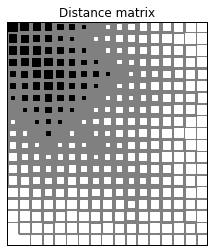

In [13]:
view_distance("recognize speech", "wreck a nice beach")

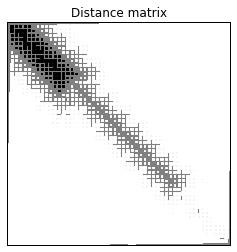

In [15]:
view_distance("it was the worst of times it was the best of times", "it was the best of times it was the worst of times")